## Pytorch Blitz

In [8]:
%%sh
pwd

/home/michal/Projects


### Tensor tutorial

In [40]:
from __future__ import print_function
import torch
import numpy as np

In [13]:
x = torch.empty(5, 3)
print(x)

tensor([[-6.5681e-08,  4.5574e-41, -6.5681e-08],
        [ 4.5574e-41,  7.1104e-04,  1.3556e-19],
        [ 1.8567e-01,  2.1017e-19,  7.5553e+28],
        [ 5.2839e-11,  7.5018e+28,  2.5744e-12],
        [ 8.1467e-33,  1.3563e-19,  1.6114e-19]])


In [15]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [17]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [18]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [19]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)

tensor([[-0.7504, -1.5493,  1.3184],
        [ 0.8739, -0.8034, -0.7734],
        [ 0.5394, -0.9661, -0.5802],
        [-0.2670,  0.7049, -0.7204],
        [-0.3021, -0.1348, -0.5529]])


In [20]:
print(x.size())

torch.Size([5, 3])


In [21]:
y = torch.rand(5, 3)
print(x + y)

tensor([[-0.2037, -1.2533,  1.3666],
        [ 1.5345, -0.0610, -0.6868],
        [ 0.5973, -0.8504,  0.3462],
        [ 0.0510,  1.2832,  0.2395],
        [-0.1795,  0.0620,  0.4331]])


In [24]:
print(torch.add(x, y))

tensor([[-0.2037, -1.2533,  1.3666],
        [ 1.5345, -0.0610, -0.6868],
        [ 0.5973, -0.8504,  0.3462],
        [ 0.0510,  1.2832,  0.2395],
        [-0.1795,  0.0620,  0.4331]])


In [25]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.2037, -1.2533,  1.3666],
        [ 1.5345, -0.0610, -0.6868],
        [ 0.5973, -0.8504,  0.3462],
        [ 0.0510,  1.2832,  0.2395],
        [-0.1795,  0.0620,  0.4331]])


Trelling "_" runs the operations inplace

In [26]:
y.add_(x)
print(y)

tensor([[-0.2037, -1.2533,  1.3666],
        [ 1.5345, -0.0610, -0.6868],
        [ 0.5973, -0.8504,  0.3462],
        [ 0.0510,  1.2832,  0.2395],
        [-0.1795,  0.0620,  0.4331]])


In [28]:
print(x[:, 1])

tensor([-1.5493, -0.8034, -0.9661,  0.7049, -0.1348])


torch.view to resize

In [33]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)

In [35]:
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


use .item() to get value as Python number

In [36]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.2997])
0.2996966242790222


In [38]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [39]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [41]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [44]:
torch.device('cuda')

device(type='cuda')

-----

### Autograd

- Automatic differentiation for all operations on tensors. If you set .requires_grad attribute on tensor to True it will track all operations. After the computations you can call backward() to calculate all the gradients. Gradient will be accumulated in the .grad attribute. To stop tracking call .detach().
- You can also skip tracking (eg. during evaluation): "with torch.no_grad():"
- Each tensor has .grad_fn attribute that stores the function that created this tensor (for derrivative calculation)

In [46]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [47]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [48]:
print(y.grad_fn)

In [49]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [50]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [51]:
out.backward()

In [53]:
# d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [55]:
x = torch.randn(3, requires_grad=True)

In [59]:
print(x)

tensor([ 0.3202, -0.2088,  2.4052], requires_grad=True)


In [57]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [58]:
print(y)

tensor([ 163.9184, -106.8931, 1231.4655], grad_fn=<MulBackward0>)


In [60]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

In [61]:
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [64]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


_____

### Neural networks

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [66]:
class Net (nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # Keras Flatten() ?
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return(x)
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [67]:
net = Net()

In [68]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [69]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [70]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0433, -0.0359, -0.0238,  0.1031,  0.0968, -0.0936, -0.0913, -0.0312,
          0.0831,  0.0874]], grad_fn=<AddmmBackward>)


In [71]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [72]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

In [73]:
loss = criterion(output, target)
print(loss)

tensor(1.1167, grad_fn=<MseLossBackward>)


When you call loss.backward() the whole graph is differentiated w.r.t to loss and all the tensors (with requires_grad = True) will have their .grad accumulated with the gradient.

In [81]:
loss.grad_fn.next_functions[0][0].next_functions[0][0]

To backpropagete the error: 1. clear existing gradients (net.zero_grad()) and then loss.backward().

In [82]:
net.zero_grad()
print(net.conv1.bias.grad)
loss.backward()
print(net.conv1.bias.grad)

tensor([0., 0., 0., 0., 0., 0.])
tensor([ 0.0155, -0.0007,  0.0144,  0.0181, -0.0057,  0.0012])


Then you just update (w = w - lr * gradient). Or use different update rules (Adam, RMSProp etc.)

In [85]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [87]:
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the actual update of the weights!

_____

### CIFAR 10

In [88]:
import torch
import torchvision
import torchvision.transforms as transforms

In [89]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|█████████▉| 170065920/170498071 [00:29<00:00, 6055875.63it/s]

Files already downloaded and verified


In [90]:
import matplotlib.pyplot as plt
import numpy as np

In [91]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [92]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [93]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  dog  deer  deer truck


In [95]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

In [96]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [97]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [98]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.204
[1,  4000] loss: 1.835
[1,  6000] loss: 1.679
[1,  8000] loss: 1.592
[1, 10000] loss: 1.515
[1, 12000] loss: 1.454
[2,  2000] loss: 1.382
[2,  4000] loss: 1.381
[2,  6000] loss: 1.313
[2,  8000] loss: 1.303
[2, 10000] loss: 1.244
[2, 12000] loss: 1.256
Finished Training


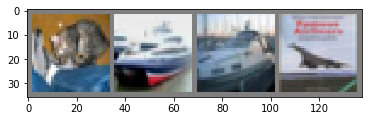

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


In [99]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))